In [6]:
import yfinance as yf

data = yf.download(tickers = "GLD", start="2017-12-01", end="2023-06-16", interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,120.940002,122.430000,120.739998,121.589996,121.589996,13080100
2017-12-04,121.150002,121.199997,120.839996,121.180000,121.180000,6943700
2017-12-05,120.099998,120.510002,119.720001,120.320000,120.320000,10041200
2017-12-06,120.040001,120.440002,119.870003,120.070000,120.070000,6643000
2017-12-07,119.010002,119.239998,118.099998,118.489998,118.489998,12900200
...,...,...,...,...,...,...
2023-06-09,182.360001,182.789993,181.720001,182.039993,182.039993,4379200
2023-06-12,181.800003,181.940002,181.039993,181.880005,181.880005,4873600
2023-06-13,182.100006,182.429993,180.169998,180.539993,180.539993,5126700


In [7]:
data = data.reset_index('Date', inplace=False)

In [8]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [9]:
# 2. Đọc file dữ liệu giá vàng GC=F và chia train test validate theo tỉ lệ 7:2:1
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [10]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.2 MB/s eta 0:00:00


In [11]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3404.517, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3416.874, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3415.676, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3415.611, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3415.883, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3413.315, Time=2.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3412.340, Time=2.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3406.489, Time=4.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3406.489, Time=3.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3417.583, Time=0.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3412.998, Time=2.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3411.178, Time=2.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3408.431, Time=2.74 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3403.888, Time=1.07 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [13]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[165.11060813 164.94273555 164.86228699 164.87378618 164.95547291
 165.07062026 165.18069359 165.25634809 165.28366764 165.26488549
 165.21450342 165.15281043 165.09911487 165.06661529 165.05999388
 165.07584623 165.10525537 165.13736643 165.1627734  165.17582143
 165.17540882 165.16437051 165.14790011 165.1316401  165.12003428
 165.11534399 165.11746533 165.12443601 165.13335244 165.14136113]


In [14]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 14.459868701357593
Testing RMSE: 8.896685231733386


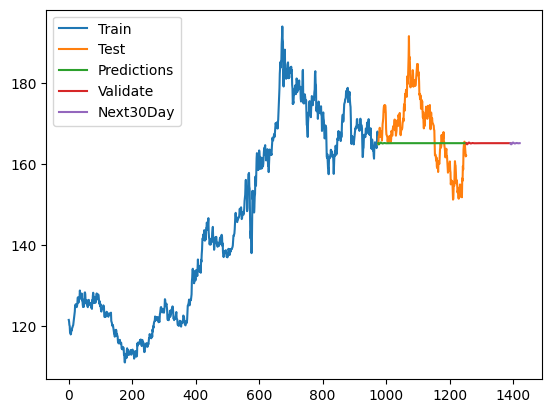

In [15]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()